# Stroke Prediction 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import os
os.chdir('D:\pga16python')

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [24]:
data.isnull().sum()/data.shape[0]

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [25]:
sns.set_style('dark')

In [29]:
import matplotlib.pyplot as plt

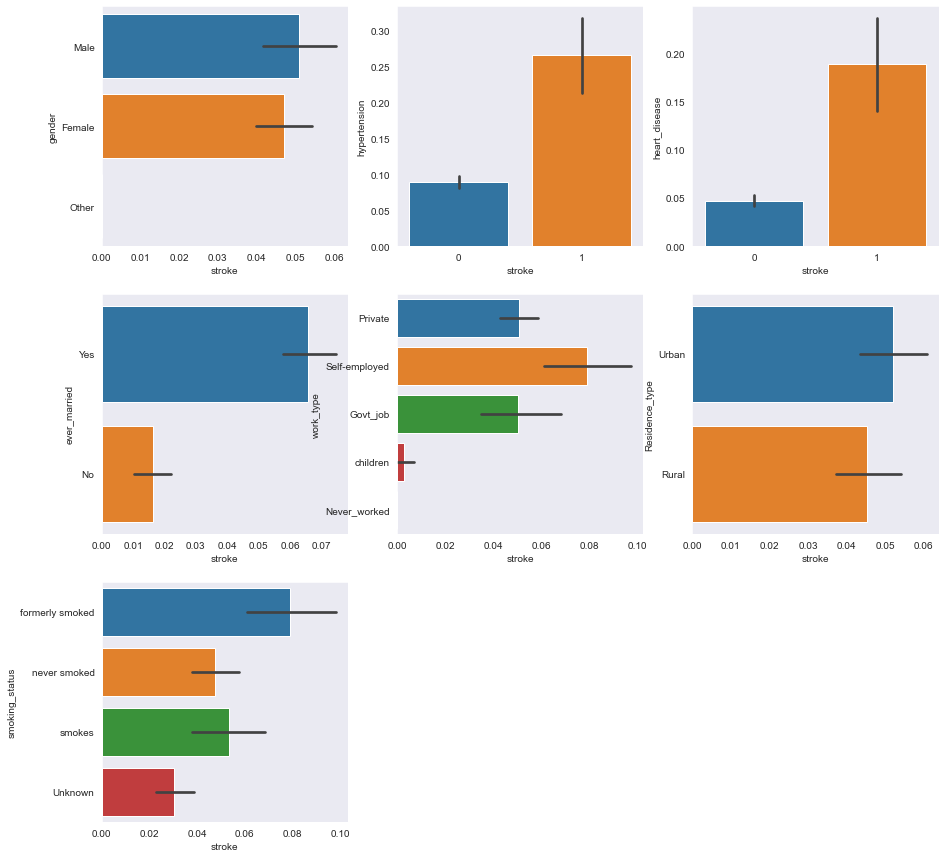

In [30]:
fig = plt.figure(figsize = [15, 15])

# Plotting the independent variables with the target variable
cat = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type','smoking_status']
count = 1

# Generating the plots
for col in cat :
    plt.subplot(3,3,count)
    sns.barplot(data = data, x = 'stroke', y = col)
    count+=1 
plt.show()

<AxesSubplot:>

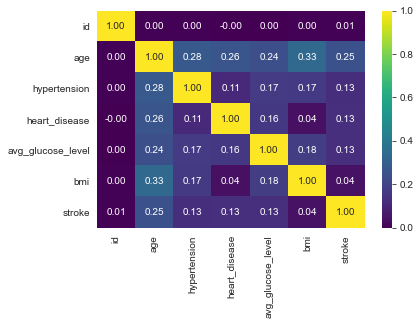

In [31]:
sns.heatmap(data.corr(),annot=True,cmap='viridis',fmt='.2f')

In [6]:
df = pd.read_csv('imputed.csv',index_col=0)

In [7]:
numerical_colums = df.select_dtypes(exclude='object').columns

In [8]:
categorical_colums = df.select_dtypes(include='object').columns

In [9]:
for i in categorical_colums:
    print(df[i].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.drop(['id'],inplace = True,axis = 1)

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [13]:
X = df.iloc[:,:-1]
y = df['stroke']

In [14]:
y.value_counts()/df.shape[0]

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
sm=SMOTE()

In [17]:
column=make_column_transformer((OneHotEncoder(),categorical_colums),remainder='passthrough')

In [19]:
rf = RandomForestClassifier()

In [20]:
parameter = {}
#kfold = KFold(n_splits = 10,shuffle = True)
CV_rf1 = GridSearchCV(rf,param_grid=parameter,verbose = True)

In [15]:
rf=RandomForestClassifier(n_estimators = 200, max_depth = 7, max_leaf_nodes= 10)

In [21]:
pip=make_pipeline(column,sm,rf)

In [73]:
pip.fit(X_train,y_train)
pip[2].best_params_

{'max_depth': 7, 'max_leaf_nodes': 10, 'n_estimators': 200}

In [28]:
y_pred_train = pip.predict(X_train)
y_pred_test = pip.predict(X_test)

In [29]:
print('Accuracy_score of Train:', accuracy_score(y_train,y_pred_train))
print('Accuracy_score of Test:', accuracy_score(y_test,y_pred_test))

Accuracy_score of Train: 0.8839809896561365
Accuracy_score of Test: 0.8825831702544031
